# Neural Networks in JAX

The goal of this post is not to to explain neural networks using JAX as a tool to do so. We will move from Linear Regression, to Neural Networks. The goal we have is to create a neural network that can approximate a simple function:

$$
f(x, y) = \sin(2x)\sin(2y)
$$

In [43]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import itertools

plt.style.use("ggplot")

In [44]:
class NeuralNetwork:
    def __init__(input_dim=2, hidden_dim=32, output_dim=1):

        pass

    def forwad(self, x):
        pass

class Adam:
    def __init__():
        pass

    def backward(self):
        pass

In [58]:
x_values = jnp.linspace(-jnp.pi, jnp.pi, 100)
y_values = jnp.cos(2 * x_values)

def forward(x, weight, bias):
    return x * weight + bias

def compute_loss(weight, bias, x_values, y_values):
    y_pred = forward(x_values, weight, bias)
    loss = jnp.sum((y_pred - y_values) ** 2)
    return loss

def compute_loss_wrapper(weight_bias, x_values, y_values):
    weight, bias = weight_bias
    return compute_loss(weight, bias, x_values, y_values)

dimension = 50

weights = jnp.linspace(-0.3,  0.5, dimension)
biases = jnp.linspace(-0.5,  0.5, dimension)

weights_biases = jnp.array(list(itertools.product(weights, biases)))
vec_compute_loss = jax.vmap(compute_loss_wrapper, in_axes=[0, None, None])
losses = vec_compute_loss(weights_biases, x_values, y_values)

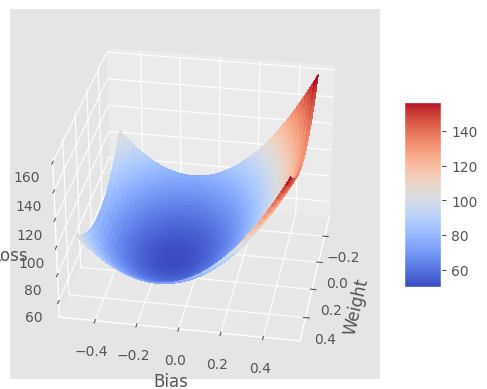

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(azim=10)

X, Y = jnp.meshgrid(weights, biases)
R = jnp.sqrt(X**2 + Y**2)
Z = losses.reshape(dimension, dimension)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Loss", labelpad=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()